# Project: Wrangle and Analyze Twitter Data

## Table of Contents
<ul>
<li><a href="#Intro">Introduction</a></li>
<li><a href="#Gather">Gathering Data</a></li>
<li><a href="#Assess">Assessing Data</a></li>
<li><a href="#Clean">Cleaning Data: Each Data Cleaning task will include a Define, Code and Test phase
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='Intro'></a>
## Introduction
<p>
The dataset that we will be wrangling and analyzing in this project is the tweet archive of Twitter user "@dog_rates", aka "WeRateDogs". WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. 

Using Python and its libraries, we will gather data from a variety of sources and in a variety of formats, assess it for quality and tidiness, clean it and store the cleaned data in different formats.

In the next step, we will analyze this cleaned data and create visualizations to draw meaningful conclusions and insights.

We will document this entire process in the form of 2 reports.
<ul>
<li>Report 1 will document the data wrangling (gathering, assessing and cleaning) process.</li>
<li>Report 2 will document the data analyses, visualizations and any inferences we draw from our analyses.</li>
</ul>
</p>

In [3]:
# Let us first import all the packages that we will need for this project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='Gather'></a>
## Gathering Data

<p>We will be gathering three pieces of data from three different sources and three different formats as described below.</p>
<br>
<b>1. The Enhanced WeRateDogs Twitter archive:</b>
        <ul>
            <li>This archive is provided to us as a .csv file "twitter-archive-enhanced.csv".</li>
            <li>The data in the archive is filtered for tweets with ratings only.</li>
            <li>We need to extract this data into a dataframe.</li>
            <li>We will then make a copy of this dataframe and use the copy for further wrangling.</li>
        </ul>

In [4]:
# Loading the Enhanced WeRateDogs Twitter archive into a pandas dataframe and printing out a sample for review

df_tweet_master = pd.read_csv('twitter-archive-enhanced.csv')
df_tweet_master.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [5]:
# Making a copy of the dataframe for furthe use

df_tweet = pd.DataFrame.copy(df_tweet_master)
df_tweet.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [6]:
df_tweet.shape

(2356, 17)

<b>2. The tweet image predictions:</b>
         <ul>
            <li>This data is stored on the cloud as a .tsv file and the url to the file is provided to us.</li>
            <li>We will need to use the "Requests" library to download and extract the contents of the file.</li>
            <li>The contents will then be imported into a separate dataframe.</li>

In [7]:
# We will import the requests library which will be used to download the .tsv file to the same folder as this .ipynb file

import requests

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
open(url.split('/')[-1], mode = 'wb').write(response.content)

335079

In [8]:
# We will now load the contents of the .tsv file into another dataframe

df_img_pred = pd.read_csv('image-predictions.tsv', sep='\t')
df_img_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<b>3. Each tweet's retweet count, favorite ("like") count, and any additional data we may find interesting:</b>
         <ul>
            <li>Using the tweet IDs in the WeRateDogs Twitter archive extracted above, we need to query the Twitter API for each tweet's JSON data.</li>
            <li>We will be using Python's Tweepy library to perform this task.</li>
            <li>We will store each tweet's entire set of JSON data in a file called tweet_json.txt.</li>
            <li>Each tweet's JSON data should be written to its own line.</li>
            <li>We will then read the JSON object in this .txt file line by line into a pandas DataFrame with extract data like tweet ID, retweet count, and favorite count.</li>
        </ul>

In [5]:
import tweepy
from tweepy import OAuthHandler
import simplejson as json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'zI1cLDgAGHE4pvUVDplzosblm'
consumer_secret = 'q6LHAJTGs3HTPdSeUuAAO59E2UiuRveuAKbfaSqYSEvHBAJ0ob'
access_token = '1099794074553462786-nfAWAJ7BQcwwRS2GBRSm1q5fyWHNdY'
access_secret = 'eKU061Vq5W37k1JHDu2Al6tVEnfdCxH53dbOj3RLXtyo0'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_tweet.tweet_id.values
tweet_ids
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print ("Status: Failed, Error Code:{}, Error Message:{}".format(e.args[0][0]['code'],e.args[0][0]['message']))
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Status: Failed, Error Code:144, Error Message:No status found with that ID.
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 8862670

Success
248: 845459076796616705
Status: Failed, Error Code:144, Error Message:No status found with that ID.
249: 845397057150107648
Success
250: 845306882940190720
Success
251: 845098359547420673
Success
252: 844979544864018432
Success
253: 844973813909606400
Success
254: 844704788403113984
Success
255: 844580511645339650
Success
256: 844223788422217728
Success
257: 843981021012017153
Success
258: 843856843873095681
Success
259: 843604394117681152
Success
260: 843235543001513987
Success
261: 842892208864923648
Status: Failed, Error Code:144, Error Message:No status found with that ID.
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272


Success
496: 813172488309972993
Success
497: 813157409116065792
Success
498: 813142292504645637
Success
499: 813130366689148928
Success
500: 813127251579564032
Success
501: 813112105746448384
Success
502: 813096984823349248
Success
503: 813081950185472002
Success
504: 813066809284972545
Success
505: 813051746834595840
Success
506: 812781120811126785
Success
507: 812747805718642688
Status: Failed, Error Code:144, Error Message:No status found with that ID.
508: 812709060537683968
Success
509: 812503143955202048
Success
510: 812466873996607488
Success
511: 812372279581671427
Success
512: 811985624773361665
Success
513: 811744202451197953
Success
514: 811647686436880384
Success
515: 811627233043480576
Success
516: 811386762094317568
Success
517: 810984652412424192
Success
518: 810896069567610880
Success
519: 810657578271330305
Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Succ

Success
749: 779377524342161408
Success
750: 779124354206535695
Success
751: 779123168116150273
Success
752: 779056095788752897
Success
753: 778990705243029504
Success
754: 778774459159379968
Success
755: 778764940568104960
Success
756: 778748913645780993
Success
757: 778650543019483137
Success
758: 778624900596654080
Success
759: 778408200802557953
Success
760: 778396591732486144
Success
761: 778383385161035776
Success
762: 778286810187399168
Success
763: 778039087836069888
Success
764: 778027034220126208
Success
765: 777953400541634568
Success
766: 777885040357281792
Success
767: 777684233540206592
Success
768: 777641927919427584
Success
769: 777621514455814149
Success
770: 777189768882946048
Success
771: 776819012571455488
Success
772: 776813020089548800
Success
773: 776477788987613185
Success
774: 776249906839351296
Success
775: 776218204058357768
Success
776: 776201521193218049
Success
777: 776113305656188928
Success
778: 776088319444877312
Success
779: 775898661951791106
Success


Success
1000: 748220828303695873
Success
1001: 747963614829678593
Success
1002: 747933425676525569
Success
1003: 747885874273214464
Success
1004: 747844099428986880
Success
1005: 747816857231626240
Success
1006: 747651430853525504
Success
1007: 747648653817413632
Success
1008: 747600769478692864
Success
1009: 747594051852075008
Success
1010: 747512671126323200
Success
1011: 747461612269887489
Success
1012: 747439450712596480
Success
1013: 747242308580548608
Success
1014: 747219827526344708
Success
1015: 747204161125646336
Success
1016: 747103485104099331
Success
1017: 746906459439529985
Success
1018: 746872823977771008
Success
1019: 746818907684614144
Success
1020: 746790600704425984
Success
1021: 746757706116112384
Success
1022: 746726898085036033
Success
1023: 746542875601690625
Success
1024: 746521445350707200
Success
1025: 746507379341139972
Success
1026: 746369468511756288
Success
1027: 746131877086527488
Success
1028: 746056683365994496
Success
1029: 745789745784041472
Success
10

Success
1249: 711363825979756544
Success
1250: 711306686208872448
Success
1251: 711008018775851008
Success
1252: 710997087345876993
Success
1253: 710844581445812225
Success
1254: 710833117892898816
Success
1255: 710658690886586372
Success
1256: 710609963652087808
Success
1257: 710588934686908417
Success
1258: 710296729921429505
Success
1259: 710283270106132480
Success
1260: 710272297844797440
Success
1261: 710269109699739648
Success
1262: 710153181850935296
Success
1263: 710140971284037632
Success
1264: 710117014656950272
Success
1265: 709918798883774466
Success
1266: 709901256215666688
Success
1267: 709852847387627521
Success
1268: 709566166965075968
Success
1269: 709556954897764353
Success
1270: 709519240576036864
Success
1271: 709449600415961088
Success
1272: 709409458133323776
Success
1273: 709225125749587968
Success
1274: 709207347839836162
Success
1275: 709198395643068416
Success
1276: 709179584944730112
Success
1277: 709158332880297985
Success
1278: 709042156699303936
Success
12

Success
1498: 692423280028966913
Success
1499: 692417313023332352
Success
1500: 692187005137076224
Success
1501: 692158366030913536
Success
1502: 692142790915014657
Success
1503: 692041934689402880
Success
1504: 692017291282812928
Success
1505: 691820333922455552
Success
1506: 691793053716221953
Success
1507: 691756958957883396
Success
1508: 691675652215414786
Success
1509: 691483041324204033
Success
1510: 691459709405118465
Success
1511: 691444869282295808
Success
1512: 691416866452082688
Success
1513: 691321916024623104
Success
1514: 691096613310316544
Success
1515: 691090071332753408
Success
1516: 690989312272396288
Success
1517: 690959652130045952
Success
1518: 690938899477221376
Success
1519: 690932576555528194
Success
1520: 690735892932222976
Success
1521: 690728923253055490
Success
1522: 690690673629138944
Success
1523: 690649993829576704
Success
1524: 690607260360429569
Success
1525: 690597161306841088
Success
1526: 690400367696297985
Success
1527: 690374419777196032
Success
15

1744: 679405845277462528
Success
1745: 679158373988876288
Success
1746: 679148763231985668
Success
1747: 679132435750195208
Success
1748: 679111216690831360
Success
1749: 679062614270468097
Success
1750: 679047485189439488
Success
1751: 679001094530465792
Success
1752: 678991772295516161
Success
1753: 678969228704284672
Success
1754: 678800283649069056
Success
1755: 678798276842360832
Success
1756: 678774928607469569
Success
1757: 678767140346941444
Success
1758: 678764513869611008
Success
1759: 678755239630127104
Success
1760: 678740035362037760
Success
1761: 678708137298427904
Success
1762: 678675843183484930
Success
1763: 678643457146150913
Success
1764: 678446151570427904
Success
1765: 678424312106393600
Success
1766: 678410210315247616
Success
1767: 678399652199309312
Success
1768: 678396796259975168
Success
1769: 678389028614488064
Success
1770: 678380236862578688
Success
1771: 678341075375947776
Success
1772: 678334497360859136
Success
1773: 678278586130948096
Success
1774: 6782

Success
1994: 672609152938721280
Success
1995: 672604026190569472
Success
1996: 672594978741354496
Success
1997: 672591762242805761
Success
1998: 672591271085670400
Success
1999: 672538107540070400
Success
2000: 672523490734551040
Success
2001: 672488522314567680
Success
2002: 672482722825261057
Success
2003: 672481316919734272
Success
2004: 672475084225949696
Success
2005: 672466075045466113
Success
2006: 672272411274932228
Success
2007: 672267570918129665
Success
2008: 672264251789176834
Success
2009: 672256522047614977
Success
2010: 672254177670729728
Success
2011: 672248013293752320
Success
2012: 672245253877968896
Success
2013: 672239279297454080
Success
2014: 672231046314901505
Success
2015: 672222792075620352
Success
2016: 672205392827572224
Success
2017: 672169685991993344
Success
2018: 672160042234327040
Success
2019: 672139350159835138
Success
2020: 672125275208069120
Success
2021: 672095186491711488
Success
2022: 672082170312290304
Success
2023: 672068090318987265
Success
20

Success
2243: 667911425562669056
Success
2244: 667902449697558528
Success
2245: 667886921285246976
Success
2246: 667885044254572545
Success
2247: 667878741721415682
Success
2248: 667873844930215936
Success
2249: 667866724293877760
Success
2250: 667861340749471744
Success
2251: 667832474953625600
Success
2252: 667806454573760512
Success
2253: 667801013445750784
Success
2254: 667793409583771648
Success
2255: 667782464991965184
Success
2256: 667773195014021121
Success
2257: 667766675769573376
Success
2258: 667728196545200128
Success
2259: 667724302356258817
Success
2260: 667550904950915073
Success
2261: 667550882905632768
Success
2262: 667549055577362432
Success
2263: 667546741521195010
Success
2264: 667544320556335104
Success
2265: 667538891197542400
Success
2266: 667534815156183040
Success
2267: 667530908589760512
Success
2268: 667524857454854144
Success
2269: 667517642048163840
Success
2270: 667509364010450944
Success
2271: 667502640335572993
Success
2272: 667495797102141441
Success
22

In [9]:
# In this step, we will read the contents of the text file line by line. Each line is a dictionary and represents a json object
# We will then extract the tweet_id, retweet_count and favorite_count from the json object and append it to a list

import json

with open('tweet_json.txt', 'r') as json_data:
    df_list = []
    for line in json_data.readlines():
        data = json.loads(line)
        tweet_id = data['id']
        retweets = data['retweet_count']
        favorites = data['favorite_count']
        tweet_id, retweets, favorites
        df_list.append({'tweet_id': tweet_id,
                'retweet_count': retweets,
                'favorite_count': favorites})

In [10]:
# We will now write the contents of the list to a pandas dataframe

df_retweet = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
df_retweet.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8259,37852
1,892177421306343426,6104,32527
2,891815181378084864,4041,24492
3,891689557279858688,8410,41204
4,891327558926688256,9109,39384


<a id='Assess'></a>
## Assessing Data
<p>
<li>We are required to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.</li>
<li>Cleaning includes merging individual pieces of data according to the rules of tidy data.</li>

### Quality Issues Observed
<ol>
    <li>Some entries are retweets. We only want the original ratings. The retweets need to be deleted.</li>
    <li>The 'source' column has dirty data with a link to download twitter on a phone. Moreover, the same value repeats over a vast majority of the entries, rendering it useless. We will drop this column. So can the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id" and "retweeted_status_timestamp" because they do not have any useful data or are not required anymore.</li>
    <li>Some of the animals in the dataset are not dogs at all. @dog_rates only rates dogs.</li>
    <li>The denominator for most ratings is 10. Entries with denominator greater than 10 seem like ratings for multiple dogs and are valid. But some have denominators other than 10 and are not ratings for multiple dogs.</li>
    <li>Entries with no dog rating information need to be deleted.</li>
    <li>There are several dog names which are wrong like "a", "the", "an", and "this". A lot of the dog names are missing and need to be filled in wherever possible.</li>
    <li>Some dog stages do not look right. Some are missing and need filling in. Some have multiple dog stage entries.</li>
    <li>There should be a single column for dog stage after consolidating information in the doggo, pupper, puppo and floffer columns. As it stands right now, the doggo, pupper, puppo and floffer columns cannot be used for any analysis.</li>
    <li>The predictions from the neural network are not all accuurate. It predicts dogs as laptops and toilet paper and desktop computers. While we are noting this down as an issue, we will not be fixing it for this project.</li>
    

### Tidyness Issues Observed
<ol>
    <li>Having merged data from the doggo, floffer, pupper and puppo columns, we will no longer need these columns.</li>
    <li>Dog breed Column needs to be added to the main dataframe. We need to update the column using data in the image predictions file, which we extracted to dataframe df_img_pred.</li>
    <li>3.	We are assuming that the most accurate breed prediction is in column "p1". Here, we are going to assume that the neural network is actually providing us with dog breeds and not paper towels and laptops. We need to also rename column "p1" to something more meaningful like "predicted_breed". We do not need the other columns and can drop them.</li>
    <li>We need to merge the retweet_count and favorite_count fields into the main dataframe. We need to update the columns using data from the json file, which we extracted to dataframe df_retweets.</li>

<a id='Clean'></a>
## Cleaning Data 
<ul>
    <li>The quality and tidyness issues observed above will need to be cleaned so we only analyze clean data.</li>
    <li>For each of the issue observed, we will split the cleaning process into</li>
    <ul>
        <li>Define: We define what needs to be done to fix the issue and clean the data.</li>
        <li>Code: We wrote code that will help implement the fix described in the Define phase.</li>
        <li>Test: We will test if the code correctly fixed the quality or tidyness issue.</li>
    </ul>
</ul>

#### Quality Issue 1: 
<p>
    <li>Some entries are retweets. We only want the original ratings. The retweets need to be deleted.</li>

In [11]:
# Define:

# The dataframe consists of retweets as well, which need to be excluded. We are only interested in tweets with original ratings.
# Let us find out how many records are retweets

retweet_df = df_tweet.query('retweeted_status_id != "NaN"')
len(retweet_df)

181

In [12]:
# Code:

## Original tweets are the ones where the retweeted_status_id is null.

df_tweet = df_tweet.query('retweeted_status_id == "NaN"')

In [13]:
# Test:

## 181 entries are retweets. The original entries should be 2356 - 181 = 2175 if the code worked.

len(df_tweet)

2175

In [14]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

#### Quality Issue 2: 
<p>
    <li>The df_tweet_e['source'] column has dirty data with a link to download twitter on a phone. Moreover, the same value repeats over a vast majority of the entries, rendering it useless. We will drop this column.</li>
    <li>So can the "in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id" and "retweeted_status_timestamp" because they are not required anymore.</li>

In [15]:
# Define:

# The columns "source", in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id","retweeted_status_user_id" 
# and "retweeted_status_timestamp" need to be removed from the dataframe.

df_tweet.shape

(2175, 17)

In [16]:
# Code:

# We will use the drop function to remove these columns from the dataframe.

df_tweet.drop(columns = ['source','in_reply_to_status_id', 'in_reply_to_user_id', "retweeted_status_id",
                         "retweeted_status_user_id", "retweeted_status_timestamp"
                        ], inplace = True)

In [17]:
# Test:

# Let us make sure these columns are dropped.

df_tweet.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [18]:
df_tweet.shape

(2175, 11)

#### Quality Issue 3: 
<p>
   <li>Some of the animals in the dataset are not dogs at all. @dog_rates only rates dogs.</li>

In [19]:
# Define:

# @dog_rates only rates dogs. They do not rate other anmimals.
# There are several records for other animals like bear, lion, tyrannosaurus rex, tiger, lobster, etc.
# There are also things like carrot.
# A frustrated admin for the @dog_rates account repeated says "We only rate dogs".
# We will extract and remove all entries, where the tweet contains "only rate dogs" or "only. rate. dogs".

df_not_dogs = df_tweet[df_tweet['text'].str.contains("only rate dogs", "only. rate. dogs")]
df_not_dogs

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
25,887101392804085760,2017-07-18 00:07:08 +0000,This... is a Jubilant Antarctic House Bear. We...,https://twitter.com/dog_rates/status/887101392...,12,10,None,None,None,None,None
59,880872448815771648,2017-06-30 19:35:32 +0000,Ugh not again. We only rate dogs. Please don't...,https://twitter.com/dog_rates/status/880872448...,12,10,None,None,None,None,None
93,874057562936811520,2017-06-12 00:15:36 +0000,"I can't believe this keeps happening. This, is...",https://twitter.com/dog_rates/status/874057562...,12,10,None,None,None,None,None
127,867900495410671616,2017-05-26 00:29:37 +0000,Unbelievable. We only rate dogs. Please don't ...,https://twitter.com/dog_rates/status/867900495...,12,10,None,None,None,None,None
131,867051520902168576,2017-05-23 16:16:06 +0000,"Oh my this spooked me up. We only rate dogs, n...",https://twitter.com/dog_rates/status/867051520...,13,10,None,None,None,None,None
141,864873206498414592,2017-05-17 16:00:15 +0000,We only rate dogs. Please don't send in Jesus....,https://twitter.com/dog_rates/status/864873206...,14,10,None,None,None,None,None
154,862096992088072192,2017-05-10 00:08:34 +0000,We only rate dogs. Please don't send perfectly...,https://twitter.com/dog_rates/status/862096992...,13,10,None,None,None,None,None
169,859196978902773760,2017-05-02 00:04:57 +0000,We only rate dogs. This is quite clearly a smo...,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,2017-04-21 16:33:22 +0000,"Guys, we only rate dogs. This is quite clearly...",https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
221,849776966551130114,2017-04-06 00:13:11 +0000,Seriously guys? Again? We only rate dogs. Plea...,https://twitter.com/dog_rates/status/849776966...,12,10,None,None,None,None,None


In [20]:
df_not_dogs.shape

(55, 11)

In [21]:
# Code:

# Looks like there are 55 records, where the animal is not a dog.
# We will now alter df_tweet to only include records for dogs.

df_tweet = df_tweet[~df_tweet['text'].str.contains("only rate dogs", "only. rate. dogs")]
df_tweet.shape

(2120, 11)

In [22]:
# Test:

#Let us ensure all the 2120 entries are for dogs only.

df_not_dogs = df_tweet[df_tweet['text'].str.contains("only rate dogs", "only. rate. dogs")]
df_not_dogs.shape

(0, 11)

#### Quality Issue 4: 
<p>
    <li>The denominator for most ratings is 10.</li>
    <li>But there are dog ratings with a denominator other than 10, that may need to be corrected.</li>

In [23]:
df_tweet['rating_denominator'].value_counts()

10     2098
50        3
80        2
11        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [24]:
df_dnot10 = df_tweet.query('rating_denominator != 10')
df_dnot10

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
433,820690176645140481,2017-01-15 17:52:40 +0000,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
902,758467244762497024,2016-07-28 01:00:57 +0000,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,2016-05-13 16:15:54 +0000,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,2016-04-21 02:25:47 +0000,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,2016-04-03 01:36:11 +0000,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None
1228,713900603437621249,2016-03-27 01:29:02 +0000,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,None,None,None,None,None


In [25]:
#Define

# Some ratings with denominator greater than 10 seem like ratings for multiple dogs and are valid.
# The denominator in such cases is a multiple of 10.
# But some have denominators other than a multiple of 10 and do not seem to be valid ratings.
# We may need to correct these ratings whose denominator is not a multiple of 10

d_dmod10 = df_tweet.query('rating_denominator%10 != 0 or rating_denominator == 0')
d_dmod10

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,2017-02-24 21:54:03 +0000,@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,960,0,None,None,None,None,None
342,832088576586297345,2017-02-16 04:45:50 +0000,@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1068,740373189193256964,2016-06-08 02:41:38 +0000,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1662,682962037429899265,2016-01-01 16:30:13 +0000,This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,7,11,Darrel,None,None,None,None
1663,682808988178739200,2016-01-01 06:22:03 +0000,"I'm aware that I could've said 20/16, but here...",NaN,20,16,None,None,None,None,None
2335,666287406224695296,2015-11-16 16:11:11 +0000,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,1,2,an,None,None,None,None


In [26]:
# There are 7 such records. Let us look at the tweet text of these records to find the correct rating information.

d_dmod10.groupby('tweet_id').text.value_counts()

tweet_id            text                                                                                                                                                                     
666287406224695296  This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv                                     1
682808988178739200  I'm aware that I could've said 20/16, but here at WeRateDogs we are very professional. An inconsistent rating scale is simply irresponsible                                  1
682962037429899265  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5                                  1
740373189193256964  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ                                 1
810984652412424192  Meet Sam. 

In [27]:
# Code

# There are only 4 records above, that have ratings information available.
# We will correct these ratings manually.
# Below are the correct ratings that we will enter into the dataframe.
# Rating for 666287406224695296 is 9/10
# Rating for 682962037429899265 is 10/10
# Rating for 740373189193256964 is 14/10
# Rating for 835246439529840640 is 13/10

df_tweet.loc[df_tweet.tweet_id == 666287406224695296, ['rating_numerator', 'rating_denominator']] = 9, 10
df_tweet.loc[df_tweet.tweet_id == 682962037429899265, ['rating_numerator', 'rating_denominator']] = 10, 10
df_tweet.loc[df_tweet.tweet_id == 740373189193256964, ['rating_numerator', 'rating_denominator']] = 14, 10
df_tweet.loc[df_tweet.tweet_id == 835246439529840640, ['rating_numerator', 'rating_denominator']] = 13, 10

In [28]:
# Test

# Let us test if the code worked.

d_dmod10 = df_tweet.query('rating_denominator%10 != 0 or rating_denominator == 0')
d_dmod10

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
342,832088576586297345,2017-02-16 04:45:50 +0000,@docmisterio account started on 11/15/15,NaN,11,15,None,None,None,None,None
516,810984652412424192,2016-12-19 23:06:23 +0000,Meet Sam. She smiles 24/7 &amp; secretly aspir...,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
1663,682808988178739200,2016-01-01 06:22:03 +0000,"I'm aware that I could've said 20/16, but here...",NaN,20,16,None,None,None,None,None


<p> Looks like the code worked!!!

#### Quality Issue 5: 
<p>
    <li>The above 3 tweets do not have any rating information</li>
    <li> We will delete these entries.</li>

In [29]:
#Define

# Tweets with tweet_id = 682808988178739200, 810984652412424192 and 832088576586297345 do not have rating information. 
# We will drop them.

In [30]:
# Code:

df_tweet.drop(df_tweet.index[[342, 516, 1663]], inplace = True)

In [31]:
# Test

# Let us test if the code worked.

df_tweet.shape

(2117, 11)

<p>
   The 3 entries with no rating are deleted. We only have 2117 instead of 2120 entries.

#### Quality Issue 6: 
<p>
    <li>A lot of the dog names are missing and need to be filled in wherever possible.</li>
    <li>Several other dog names like "a", "the", "an", and "this" are wrong and need to be corrected.</li>

In [32]:
df_tweet.name.value_counts()

None        644
a            48
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          8
Toby          7
Daisy         7
the           7
Bo            6
Bella         6
Stanley       6
Jax           6
Oscar         6
Koda          6
Bailey        6
Louis         5
Dave          5
Buddy         5
an            5
Rusty         5
Chester       5
Leo           5
Milo          5
Scout         5
           ... 
Klein         1
Rover         1
Karl          1
Pumpkin       1
Bronte        1
Quinn         1
Jareld        1
Tyrone        1
Trevith       1
Brat          1
Tuck          1
Combo         1
Kaiya         1
Gerbald       1
Erik          1
Meatball      1
Augie         1
Lilly         1
Noah          1
Dobby         1
Barney        1
Divine        1
Vixen         1
Carper        1
Gordon        1
Jiminus       1
Edgar         1
Laika         1
Hector        1
Sid           1
Name: name, Length: 951,

In [33]:
# Define:

# There are 644 records with no name. There are deveral others which are wrong.
# We need to try to extract the correct name from the tweet text.
# Once the correct names are extracted, the wrong names need to be replaced with the correct ones.

df_noname = df_tweet.query('name == "None" or name == "a" or name == "the" or name == "an" or name == "this"')
df_noname.shape

(705, 11)

In [34]:
# Code:

# There are 705 entries with no name, or a", "the", "an", and "this".
# We will split the text of the tweet to try and extract the name.

df_yesname = df_noname[df_noname['text'].str.contains("name", "named")]
df_yesname.drop(['timestamp','expanded_urls','rating_numerator','rating_denominator','doggo','floofer','pupper','puppo'], 
                axis = 1, inplace = True)

df_yesname['name1'] = df_yesname['text'].str.split('named ', n=1, expand = True)[1].str.split(' ', n=1, expand = True)[0]
df_yesname['name2'] = df_yesname['text'].str.split('name is ', n=1, expand = True)[1].str.split(' ', n=1, expand = True)[0]
df_yesname['name_f'] = df_yesname['name1'].map(str) + df_yesname['name2'].map(str)
df_yesname['name_f'].replace('None', ' ', inplace = True)
df_yesname['name_f'].dropna()
df_yesname

C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\avinashk\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

,tweet_id,text,name,name1,name2,name_f
35,885518971528720385,I have a new hero and his name is Howard. 14/1...,None,None,Howard.,NoneHoward.
149,863079547188785154,Ladies and gentlemen... I found Pipsy. He may ...,None,None,None,NoneNone
168,859607811541651456,Sorry for the lack of posts today. I came home...,None,None,Zoey,NoneZoey
843,766714921925144576,His name is Charley and he already has a new s...,None,None,Charley,NoneCharley
1596,686286779679375361,When bae calls your name from across the room....,None,None,None,NoneNone
1678,682047327939461121,We normally don't rate bears but this one seem...,None,None,Thea.,NoneThea.
1734,679736210798047232,This pup's name is Sabertooth (parents must be...,None,None,Sabertooth,NoneSabertooth
1853,675706639471788032,This is a Sizzlin Menorah spaniel from Brookly...,a,Wylie.,None,Wylie.None
1955,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip...,a,Kip.,None,Kip.None
2034,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yac...,a,Jacob,None,JacobNone


In [35]:
# we will now replace the missing name values in our original dataframe with the names in df_yesname, based on the tweet_id

df_tweet.loc[df_tweet.tweet_id.isin(df_yesname.tweet_id), ['name']] = df_yesname[['name_f']]

In [36]:
# Test:

# If not all we should have converted some "None" to a proper name. Looks like the count of "None" reduced to 631 from 644.
# The number of entries with name "a" has reduced from 48 to 28.
# No name was available to be extracted for the rest of the entries.

df_tweet.name.value_counts()

None        631
a            28
Lucy         11
Charlie      11
Cooper       10
Oliver       10
Tucker        9
Penny         9
Winston       8
Sadie         8
Lola          8
Toby          7
Daisy         7
the           7
Bo            6
Bella         6
Stanley       6
Jax           6
Bailey        6
Koda          6
Oscar         6
Bentley       5
Louis         5
Dave          5
Buddy         5
Rusty         5
Chester       5
Leo           5
Milo          5
Scout         5
           ... 
Klein         1
Rover         1
Karl          1
Pumpkin       1
Bronte        1
Quinn         1
Jareld        1
Tyrone        1
Trevith       1
Brat          1
Tuck          1
Combo         1
Kaiya         1
Gerbald       1
Erik          1
Meatball      1
Augie         1
Lilly         1
Noah          1
Dobby         1
Barney        1
Divine        1
Vixen         1
Carper        1
Gordon        1
Jiminus       1
Edgar         1
Laika         1
Hector        1
Sid           1
Name: name, Length: 951,

#### Quality Issue 7: 
<p>
   <li>Some dog stages do not look right. Some are missing and need filling in. Some have multiple dog stage entries.</li>

In [37]:
# Define

# We need to extract dog stage from the text of the tweet and aggregate values in a new column dog_stage

In [38]:
df_tweet['doggo'].value_counts()

None     2030
doggo      87
Name: doggo, dtype: int64

In [39]:
df_doggo = df_tweet[df_tweet['text'].str.contains("doggo", )]
df_doggo.shape

(88, 11)

<p>
    <li>We are able to add one more entry (88 as compared to 87) to the list of doggos. Yay!!!</li>
    <li>We will write the value "doggo" for these 88 entries in the column doggo.</li>

In [40]:
df_tweet['floofer'].value_counts()

None       2107
floofer      10
Name: floofer, dtype: int64

In [41]:
df_floofer = df_tweet[df_tweet['text'].str.contains("floof")]
df_floofer.shape

(22, 11)

<p>
    <li>We are able to add more entries (22 as compared to 10) to the list of floofers. Yay!!!</li>
    <li>We will write the value "floffer" for these 22 entries in the column floffer.</li>

In [42]:
df_tweet['pupper'].value_counts()

None      1883
pupper     234
Name: pupper, dtype: int64

In [43]:
df_pupper = df_tweet[df_tweet['text'].str.contains("pupper")]
df_pupper.shape

(250, 11)

<p>
    <li>We are able to add more entries (250 as compared to 234) to the list of puppers. Yay!!!</li>
    <li>We will write the value "pupper" for these 250 entries in the column puppo.</li>

In [44]:
df_tweet['puppo'].value_counts()

None     2092
puppo      25
Name: puppo, dtype: int64

In [45]:
df_puppo = df_tweet[df_tweet['text'].str.contains("puppo")]
df_puppo.shape

(32, 11)

<p>
    <li>We are able to add more entries (32 as compared to 25) to the list of puppers. Yay!!!</li>
    <li>We will write the value "puppo" for these 32 entries in the column puppo.</li>

In [46]:
# Code

#Let us now change the values in the doggo, floffer, pupper and puppo columns if the tweet text has those values.


df_tweet['doggo'] = np.where(df_tweet['text'].str.contains('doggo|doggos', case=False, na=False), 'doggo', '')

In [47]:
df_tweet['floofer'] = np.where(df_tweet['text'].str.contains('floof|floofer|floofs', case=False, na=False), 'floofer', '')

In [48]:
df_tweet['pupper'] = np.where(df_tweet['text'].str.contains('pupper|puppers', case=False, na=False), 'pupper', '')

In [49]:
df_tweet['puppo'] = np.where(df_tweet['text'].str.contains('puppo|puppos', case=False, na=False), 'puppo', '')

In [50]:
# Test

df_tweet['doggo'].value_counts()

         2022
doggo      95
Name: doggo, dtype: int64

In [51]:
df_tweet['floofer'].value_counts()

           2081
floofer      36
Name: floofer, dtype: int64

In [52]:
df_tweet['pupper'].value_counts()

          1857
pupper     260
Name: pupper, dtype: int64

In [53]:
df_tweet['puppo'].value_counts()

         2084
puppo      33
Name: puppo, dtype: int64

#### Quality Issue 8: 
<p>
   <li>There should be a single column for dog stage after consolidating information in the doggo, pupper, puppo and floffer columns.</li>
   <li>As it stands right now, the doggo, pupper, puppo and floffer columns cannot be used for any analysis.</li>

In [54]:
#Define

# There should be a new column dog_stage with values doggo, floofer, pupper and puppo.
# We need to merge values in the columns doggo, floffer, pupper and puppo into the new column.

In [56]:
# Code

df_tweet['dog_stage'] = df_tweet['doggo'].map(str) + df_tweet['floofer'].map(str) + df_tweet['pupper'].map(str) + df_tweet['puppo'].map(str)

In [57]:
# Test

df_tweet['dog_stage'].value_counts()

                 1708
pupper            249
doggo              81
floofer            33
puppo              31
doggopupper        10
doggofloofer        2
doggopuppo          2
flooferpupper       1
Name: dog_stage, dtype: int64

<li>We were able to merge the values from 4 different columns into a single column.</li>
<li>It looks like there are a few entries with more than one dog stage.</li>
<li>As you may recall, there are several entries for multiple dogs. It is possible, there are different stages of dogs in those entries.</li>
<li>There are still 1708 entries without any classification of dog stage.</li>

#### Quality Issue 9: 
<p>
   <li>The predictions from the neural network are not all accuurate. It predicts dogs as laptops and toilet paper and desktop computers. While we are noting this down as an issue, we will not be fixing it for this project.</li>

#### Tidyness Issue 1: 
<p>
   <li>Now that we have merged data from the doggo, floofer, pupper and puppo columns, we no longer need these columns.</li>

In [58]:
# Define

# Drop columns doggo, floofer, pupper and puppo from the dataframe

In [59]:
# Code

df_tweet.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

In [60]:
# Test

df_tweet.head(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,


#### Tidyness Issue 2: 
<p>
    <li>Dog breed Column needs to be added to the main dataframe.</li>
    <li>We need to update the column using data in the image predictions file, which we extracted to dataframe df_img_pred</li>

In [61]:
# Define

# Dog breed Column needs to be added to the main dataframe.
# We need to update the column using data in the image predictions file, which we extracted to dataframe df_img_pred

In [62]:
# Code

df_tweet = pd.merge(df_tweet, df_img_pred, how='inner', on=['tweet_id'])

In [63]:
# Test

df_tweet.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### Tidyness Issue 3: 
<p>
    <li>The most accurate breed prediction is in column "p1". Here, we are going to assume that the neural network is actually providing us with dog breeds and not paper towels and laptops.</li>
    <li>We need to also rename column "p1" to something more meaningful like "predicted_breed"</li>
    <li>We do not need the other columns and can drop them.</li>

In [65]:
# Define

# Drop all new columns merged, except "p1".
# Rename label "p1" to "predicted_breed".

In [66]:
# Code

df_tweet.drop(['jpg_url','img_num','p1_conf','p1_dog','p2','p2_conf','p2_dog','p3','p3_conf','p3_dog'], axis=1, inplace=True)

In [67]:
df_tweet.rename(columns={'p1':'predicted_breed'}, inplace=True)

In [68]:
# Test

df_tweet.sample(1)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,predicted_breed
729,747103485104099331,2016-06-26 16:25:26 +0000,"Guys... I said DOGS with ""shark qualities"" or ...",https://twitter.com/dog_rates/status/747103485...,11,10,None,,Labrador_retriever


#### Tidyness Issue 4: 
<p>
    <li>We need to merge the retweet_count and favorite_count fields into the main dataframe.</li>
    <li>We need to update the columns using data from the json file, which we extracted to dataframe df_retweet.</li>

In [69]:
# Define

# Merge "retweet_count" and "favorite_count" from the df_retweet dataframe into the main dataframe.

In [70]:
### Code

df_tweet = pd.merge(df_tweet, df_retweet, how='inner', on=['tweet_id'])

In [71]:
# Test 

df_tweet.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,predicted_breed,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,orange,8259,37852
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,Chihuahua,6104,32527


In [72]:
df_tweet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1936 entries, 0 to 1935
Data columns (total 11 columns):
tweet_id              1936 non-null int64
timestamp             1936 non-null object
text                  1936 non-null object
expanded_urls         1936 non-null object
rating_numerator      1936 non-null int64
rating_denominator    1936 non-null int64
name                  1905 non-null object
dog_stage             1936 non-null object
predicted_breed       1936 non-null object
retweet_count         1936 non-null int64
favorite_count        1936 non-null int64
dtypes: int64(5), object(6)
memory usage: 181.5+ KB


Looks like we were able to merge all entries except 1 (1936 instead of 1937).

# Conclusions
<p>
<li>We cleaned dirty data, filled in missing data and deleted unwanted data from the main dataframe.</li>
<li>We also merged useful data from other dataframes into the main dataframe.</li>
<li>The dataframe now looks very clean and tidy.</li>
<li>We are now ready to export this final dataframe to a .csv and/or .sql file.</li>

# Exporting Data to .csv and .sql

In [73]:
# Exporting dataframe to .csv file

df_tweet.to_csv('twitter_archive_master.csv', index=False)

In [74]:
# Exporting dataframe to .sql file

import sqlite3
connex = sqlite3.connect('twitter_archive_master.sql')
df_tweet.to_sql("twitter_archive_master", connex, if_exists="replace")
connex.close()

# Analysis & Visualizations

Now that we have clean data, let us move on to analyzing the data and creating visualizations.

In [75]:
# Let us see how many unique breeds of dogs are in our data

df_tweet.predicted_breed.nunique()

369

We are able to see that there are 369 different breeds of dogs predicted by the neural network. (Assuming all of the predictions are for dogs and not other things.)

### Analysis 1: Distribution of dog breeds by tweet count

In [77]:
# Let us now see which of these dog breeds have the most number of original tweets.

df_tweet.predicted_breed.value_counts()

golden_retriever             137
Labrador_retriever            89
Pembroke                      85
Chihuahua                     78
pug                           51
Pomeranian                    38
toy_poodle                    38
chow                          37
Samoyed                       36
malamute                      29
cocker_spaniel                26
French_bulldog                23
Chesapeake_Bay_retriever      22
seat_belt                     21
miniature_pinscher            21
German_shepherd               20
Siberian_husky                20
Staffordshire_bullterrier     19
Maltese_dog                   18
Eskimo_dog                    18
Shetland_sheepdog             18
teddy                         18
Shih-Tzu                      17
Cardigan                      17
Rottweiler                    17
beagle                        17
kuvasz                        16
Lakeland_terrier              16
Italian_greyhound             15
web_site                      15
          

### Visualization 1: Distribution of dog breeds by tweet count

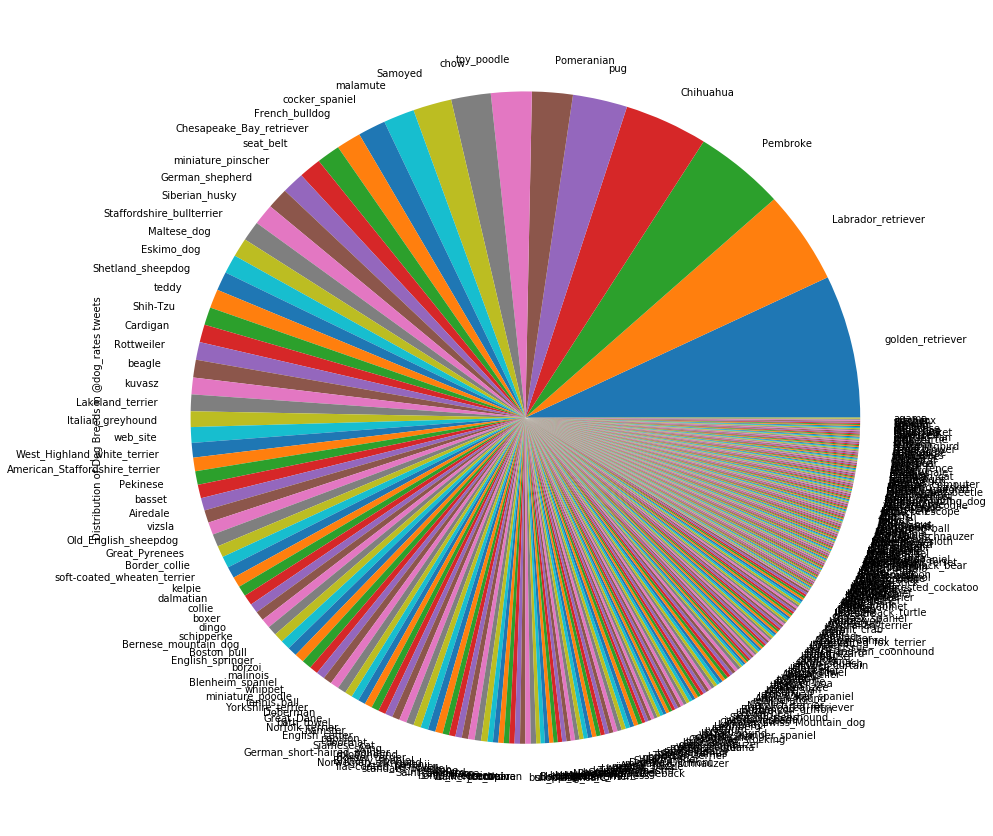

In [78]:
# We can also look at the above data visually to get a better idea of the tweet distribution by dog breed.

df_tweet.predicted_breed.value_counts().plot(kind="pie", figsize=(15,15), label="Distribution of Dog Breeds in @dog_rates tweets");

### Conclusion: Distribution of dog breeds by tweet count

<li>It looks like Golden Retrievers have the most original tweets (137), followed by Labrador Retrievers (89), Pembrokes (85) and then Chihuahuas (78).</li>
<li>It could be because a lot of people do own Golden Retrievers or Labrador Retrievers as compared to other dogs.</li>

### Analysis 2: Highly Rated dog breeds

There were several tweets with multiple dogs and the ratings were multiplied by the number of dogs. So, we had to average out the ratings for each dog. Below are our findings on the average rating ratio (rating numerator / rating denominator) for each dog breed.

We will make a copy of this dataframe and calculate the ratio for our visualizations

In [80]:
df_ratio = pd.DataFrame.copy(df_tweet)

df_ratio['rating_ratio'] = df_ratio['rating_numerator']/df_ratio['rating_denominator']
df_ratio.groupby('predicted_breed').rating_ratio.mean().sort_values(ascending=False)

predicted_breed
bow_tie             45.15
microphone          42.00
clumber              2.70
military_uniform     1.40
laptop               1.40
limousine            1.40
pedestal             1.40
prison               1.40
orange               1.30
revolver             1.30
convertible          1.30
quilt                1.30
tiger_shark          1.30
dough                1.30
fountain             1.30
teapot               1.30
syringe              1.30
padlock              1.30
hammer               1.30
cliff                1.30
snowmobile           1.30
loupe                1.30
marmot               1.30
grille               1.30
restaurant           1.30
bannister            1.30
canoe                1.30
upright              1.30
barbell              1.30
bakery               1.30
                    ...  
killer_whale         0.50
boathouse            0.50
Japanese_spaniel     0.50
clog                 0.50
jellyfish            0.45
radio_telescope      0.40
shopping_basket      0

A few ratings for bow_tie and microphone are skewing up the ratings and are outliers. We will have to delete these records.

In [81]:
df_ratio.query('predicted_breed == "bow_tie" or predicted_breed == "microphone" or predicted_breed == "clumber"')

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,predicted_breed,retweet_count,favorite_count,rating_ratio
531,778027034220126208,2016-09-20 00:24:34 +0000,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,pupper,clumber,1758,6945,2.7
699,749981277374128128,2016-07-04 15:00:45 +0000,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,,bow_tie,2613,5351,177.6
772,740365076218183684,2016-06-08 02:09:24 +0000,When the photographer forgets to tell you wher...,https://twitter.com/dog_rates/status/740365076...,10,10,None,,bow_tie,461,2580,1.0
1108,694905863685980160,2016-02-03 15:30:43 +0000,This is Archie. He's a Bisquick Taj Mapaw. Too...,https://twitter.com/dog_rates/status/694905863...,10,10,Archie,,bow_tie,986,2868,1.0
1660,670842764863651840,2015-11-29 05:52:33 +0000,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420,10,None,,microphone,8909,24837,42.0
1704,670420569653809152,2015-11-28 01:54:54 +0000,This is Damon. The newest presidential candida...,https://twitter.com/dog_rates/status/670420569...,10,10,Damon,,bow_tie,322,632,1.0


In [82]:
# Entries 699 and 1660 are skewing up all the ratings ratios and are outliers. We will delete these entries for the purpose
# of this analysis.

df_ratio.drop(df_ratio.index[[699,1660]], inplace=True)

In [83]:
# Let us try our analyses now.

df_ratio.groupby('predicted_breed').rating_ratio.mean().sort_values(ascending=False)

predicted_breed
clumber             2.700000
military_uniform    1.400000
limousine           1.400000
laptop              1.400000
pedestal            1.400000
prison              1.400000
marmot              1.300000
restaurant          1.300000
syringe             1.300000
teapot              1.300000
loupe               1.300000
cliff               1.300000
tiger_shark         1.300000
canoe               1.300000
orange              1.300000
upright             1.300000
quilt               1.300000
barbell             1.300000
convertible         1.300000
dough               1.300000
bakery              1.300000
bannister           1.300000
fountain            1.300000
snowmobile          1.300000
grille              1.300000
padlock             1.300000
revolver            1.300000
hammer              1.300000
Pomeranian          1.286842
home_theater        1.260000
                      ...   
clog                0.500000
fiddler_crab        0.500000
triceratops         0.50000

### Conclusion: Highly Rated dog breeds

And the award goes to…. Drum roll………

<b>Clumber…… 27/10</b>

Clumbers have the highest rating followed by military uniforms, limousines, laptops, pedestals and prisons – all at <b>14/10</b>.

### Analysis 3: Distribution of dog breeds by retweet count

Retweet Count is a big measure of how much a resonated or piqued people’s interest or curiosity. We can try to see which of the breeds of dogs had the most average retweet count.

In [84]:
df_tweet.groupby('predicted_breed').retweet_count.mean().sort_values(ascending=False)

predicted_breed
Arabian_camel        19246.000000
conch                18744.000000
upright              17898.000000
bubble               16354.000000
gondola              15695.500000
beaver               15316.000000
laptop               14377.000000
prison               13798.000000
revolver             13796.000000
remote_control       13514.000000
quilt                11758.000000
limousine            11373.000000
barbell              10254.000000
pillow                9489.000000
microphone            8909.000000
fountain              8903.000000
cash_machine          8697.000000
orange                8259.000000
basketball            8007.000000
hippopotamus          7976.666667
padlock               7968.000000
cliff                 7863.000000
swing                 7526.285714
home_theater          7159.800000
standard_poodle       7096.166667
school_bus            6819.000000
brown_bear            6690.333333
dough                 6048.000000
gas_pump              5940.00000

### Visualization 2: Distribution of dog breeds by retweet count

We can also look at the above data visually to get a better idea of the average retweet distribution by dog breed.<br>
<b>Word of caution</b> – There are a lot of breeds and the visualization is going to be crowded.

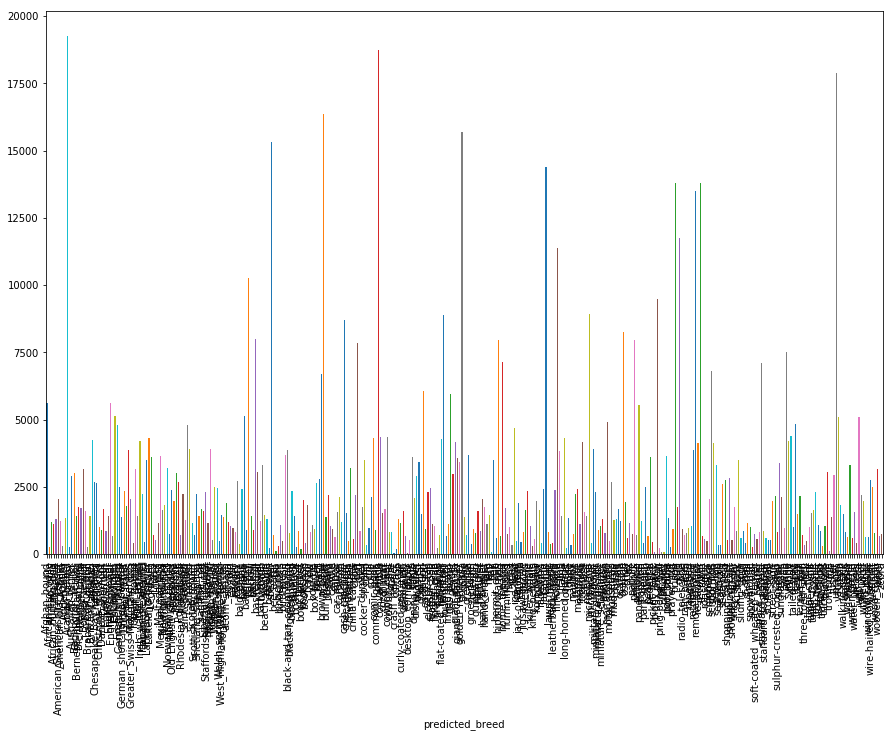

In [85]:
df_tweet.groupby('predicted_breed').retweet_count.mean().plot(kind='bar', figsize = (15,10), label="Bar Chart of Retweet Count" );

### Conclusion: Distribution of dog breeds by retweet count

American Camels had the highest average retweet count, followed by Conchs, Uprights and Bubbles. There must be definitely something interesting about these breeds in those tweets.

While these are some genuine tweets about American Camels, Conch, Uprights and other breeds, the results of a few other breeds are very interesting. People also tweeted back about prisons, revolvers, remote_controls, microphones, fountains and cash_machines.

Suppose we assume the neural network is NOT predicting correctly, we can very well see why people were wondering why someone would tweet about these things on a dog ratings twitter page.

### Analysis 4: Distribution of dog breeds by favorites count

Favorites Count is a measure of how much people “like”d a certain tweet. Let us try to see which of the breeds of dogs had the most average favorite count.

In [86]:
df_tweet.groupby('predicted_breed').favorite_count.mean().sort_values(ascending=False)

predicted_breed
laptop               64878.000000
limousine            45239.000000
conch                45038.000000
fountain             43677.000000
Arabian_camel        40436.000000
bubble               39248.000000
orange               37852.000000
beaver               37271.000000
prison               34141.500000
revolver             34017.000000
basketball           33833.000000
barbell              33823.000000
upright              33575.000000
quilt                31927.000000
remote_control       29211.000000
gondola              26495.500000
microphone           24837.000000
paper_towel          23810.500000
Saluki               23129.000000
padlock              22968.000000
hippopotamus         22793.000000
swing                22470.571429
convertible          21942.000000
home_theater         21882.000000
school_bus           20968.000000
marmot               20545.000000
mortarboard          20084.000000
French_bulldog       19065.217391
comic_book           18452.00000

### Conclusion: Distribution of dog breeds by favorite count

Laptops take away the cake with 64878 average favorite count and are the most “liked” dog breeds on the @dog_rates twitter page.

They are almost 20,000 favorites higher than the next highest Limousines. 

There are also Conchs, Fountains, American Camels, bubbles and oranges which are not too far in the popularity list.